In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import folium
import datetime as dt

# __Feature exploration__

|변수|타입|설명|
|---|---|-------|
taxi_id|INTEGER|A unique identifier for the taxi.
trip_start_timestamp|TIMESTAMP|When the trip started, rounded to the nearest 15 minutes.
trip_end_timestamp|TIMESTAMP|When the trip ended, rounded to the nearest 15 minutes.
trip_seconds|INTEGER|Time of the trip in seconds.
trip_miles|FLOAT|Distance of the trip in miles.
pickup_census_tract|INTEGER|"The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips."
dropoff_census_tract|INTEGER|"The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips."
pickup_community_area|INTEGER|The Community Area where the trip began.
dropoff_community_area|INTEGER|The Community Area where the trip ended.
fare|FLOAT|The fare for the trip.
tips|FLOAT|The tip for the trip. Cash tips generally will not be recorded.
tolls|FLOAT|The tolls for the trip.
extras|FLOAT|Extra charges for the trip.
trip_total|FLOAT|Total cost of the trip, the total of the fare, tips, tolls, and extras.
payment_type|STRING|Type of payment for the trip.
company|INTEGER|The id code for the taxi company.
pickup_latitude|INTEGER|"The id code for the latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy."
pickup_longitude|INTEGER|"The id code for the center of the pickup census tract or the community area if the census tract has been hidden for privacy."
pickup_location|STRING|"The location of the center of the pickup census tract or the community area if the census tract has been hidden for privacy."
dropoff_latitude|INTEGER|"The id code for the center of the dropoff census tract or the community area if the census tract has been hidden for privacy."
dropoff_longitude|INTEGER|"The id code for the center of the dropoff census tract or the community area if the census tract has been hidden for privacy."
dropoff_location|STRING|"The location of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy."


# 0. Data Load

In [2]:
taxi1 = pd.read_csv("./chicago-taxi-rides-2016/chicago_taxi_trips_2016_01.csv")

In [3]:
# data copy
jan = taxi1.copy()

In [4]:
jan.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [5]:
jan.tail()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
1705800,1279.0,2016-1-30 19:30:00,2016-1-30 19:45:00,840.0,2.4,NaN,NaN,22.0,7.0,10.25,0.00,0.0,0.0,10.25,Cash,82.0,604.0,668.0,173.0,203.0
1705801,8112.0,2016-1-28 17:45:00,2016-1-28 17:45:00,0.0,0.0,NaN,NaN,NaN,NaN,45.25,9.05,0.0,0.0,54.30,Credit Card,119.0,NaN,NaN,NaN,NaN
1705802,1213.0,2016-1-28 06:30:00,2016-1-28 06:45:00,1380.0,17.9,NaN,313.0,32.0,76.0,44.00,5.00,0.0,0.0,49.00,Credit Card,92.0,64.0,231.0,225.0,6.0
1705803,1911.0,2016-1-17 12:30:00,2016-1-17 12:45:00,960.0,2.5,NaN,807.0,8.0,28.0,11.75,0.00,0.0,1.0,12.75,Cash,NaN,161.0,649.0,411.0,545.0
1705804,8206.0,2016-1-31 03:15:00,2016-1-31 03:15:00,360.0,2.1,NaN,791.0,8.0,24.0,8.25,3.00,0.0,1.0,12.25,Credit Card,NaN,419.0,615.0,255.0,300.0


In [6]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705805 entries, 0 to 1705804
Data columns (total 20 columns):
taxi_id                   float64
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type              object
company                   float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtypes: float64(17), object(3)
memory usage: 260.3+ MB


In [7]:
# 전체 통계량 확인
jan.describe().T

,count,mean,std,min,25%,50%,75%,max
taxi_id,1705782.0,4389.322578,2515.819259,0.0,2242.0,4386.0,6591.0,8762.00
trip_seconds,1705491.0,653.442182,932.726047,0.0,240.0,480.0,840.0,86340.00
trip_miles,1705791.0,2.872702,18.107934,0.0,0.0,1.0,2.4,3280.00
pickup_census_tract,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_census_tract,967479.0,516.822016,357.586612,2.0,225.0,504.0,807.0,1140.00
pickup_community_area,1420016.0,23.220739,19.819355,1.0,8.0,22.0,32.0,77.00
dropoff_community_area,1392150.0,20.990691,17.372373,1.0,8.0,15.0,32.0,77.00
fare,1705772.0,13.153964,32.874215,0.0,6.0,8.0,13.5,9002.29
tips,1705772.0,1.515107,2.744961,0.0,0.0,0.0,2.0,450.00
tolls,1705772.0,0.004308,0.836362,0.0,0.0,0.0,0.0,999.99


In [8]:
# 결측치 수 확인
jan.isnull().sum()

taxi_id                        23
trip_start_timestamp            0
trip_end_timestamp            125
trip_seconds                  314
trip_miles                     14
pickup_census_tract       1705805
dropoff_census_tract       738326
pickup_community_area      285789
dropoff_community_area     313655
fare                           33
tips                           33
tolls                          33
extras                         33
trip_total                     33
payment_type                    0
company                    632726
pickup_latitude            285757
pickup_longitude           285757
dropoff_latitude           311682
dropoff_longitude          311682
dtype: int64

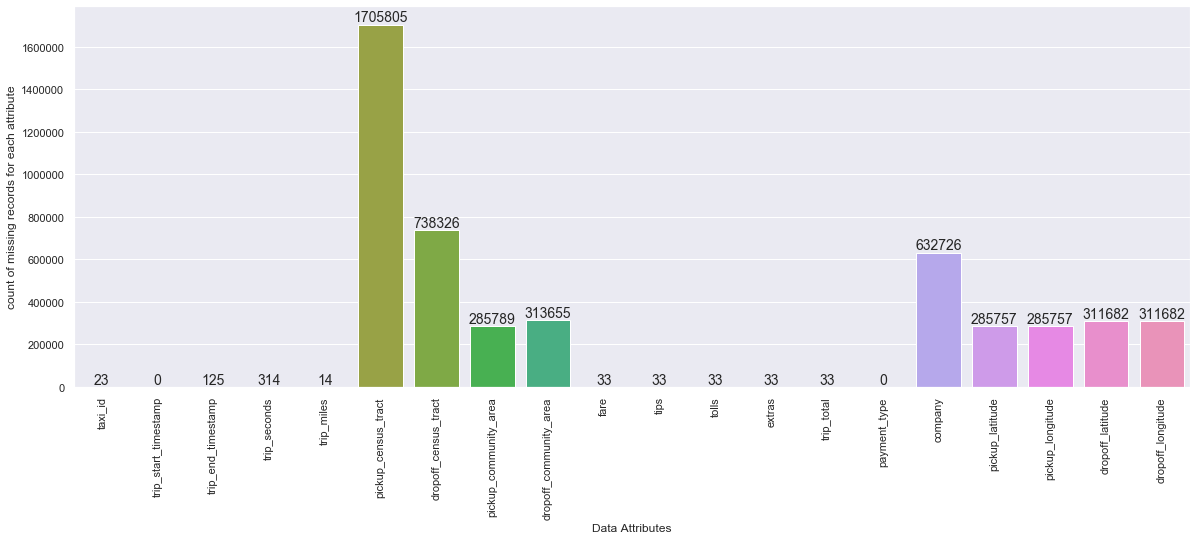

In [9]:
# 결측치 시각화
x = jan.columns
y = jan.isnull().sum()

plt.figure(figsize=(20,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [10]:
for f in jan.columns:
    na = jan[f].isnull().sum()
    print(f, "->", "Missing values:", na, "Percentage:", na/len(jan)*100)

taxi_id -> Missing values: 23 Percentage: 0.0013483370021778573
trip_start_timestamp -> Missing values: 0 Percentage: 0.0
trip_end_timestamp -> Missing values: 125 Percentage: 0.007327918490097052
trip_seconds -> Missing values: 314 Percentage: 0.018407731247123794
trip_miles -> Missing values: 14 Percentage: 0.0008207268708908696
pickup_census_tract -> Missing values: 1705805 Percentage: 100.0
dropoff_census_tract -> Missing values: 738326 Percentage: 43.283141976955164
pickup_community_area -> Missing values: 285789 Percentage: 16.75390797893077
dropoff_community_area -> Missing values: 313655 Percentage: 18.387506192091124
fare -> Missing values: 33 Percentage: 0.0019345704813856215
tips -> Missing values: 33 Percentage: 0.0019345704813856215
tolls -> Missing values: 33 Percentage: 0.0019345704813856215
extras -> Missing values: 33 Percentage: 0.0019345704813856215
trip_total -> Missing values: 33 Percentage: 0.0019345704813856215
payment_type -> Missing values: 0 Percentage: 0.0
co

In [11]:
jan.columns

Index(['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude'],
      dtype='object')

- 결측치를 확인해보면 총 9가지 변수에서 결측치가 확인되었다.
- pickup_census_tract
- dropoff_census_tract
- pickup_community_area
- dropoff_census_tract
- company
- pickup_latitude
- pickup_longitude
- dropoff_latitude
- dropoff_longitude

## Data Preprocessing

### 요금정보 결측치 제거

In [12]:
# trip_total이 결측치인 데이터 인덱스 리스트 생성
idx_list = jan.loc[jan.trip_total.isnull()].index
jan.drop(labels=idx_list,axis=0,inplace=True)

In [13]:
jan.isnull().sum()

taxi_id                        23
trip_start_timestamp            0
trip_end_timestamp            125
trip_seconds                  314
trip_miles                     14
pickup_census_tract       1705772
dropoff_census_tract       738308
pickup_community_area      285787
dropoff_community_area     313651
fare                            0
tips                            0
tolls                           0
extras                          0
trip_total                      0
payment_type                    0
company                    632722
pickup_latitude            285755
pickup_longitude           285755
dropoff_latitude           311678
dropoff_longitude          311678
dtype: int64

In [14]:
# row drop으로 인한 인덱스 재설정
jan_1 = jan.reset_index().drop('index', axis = 1)
jan_1.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [15]:
# pickup_census_tract, company는 결측치가 너무 많아 삭제한다.
jan.drop(['pickup_census_tract', 'company'],axis=1, inplace = True)

In [16]:
jan['dropoff_census_tract'].isnull().sum()

738308

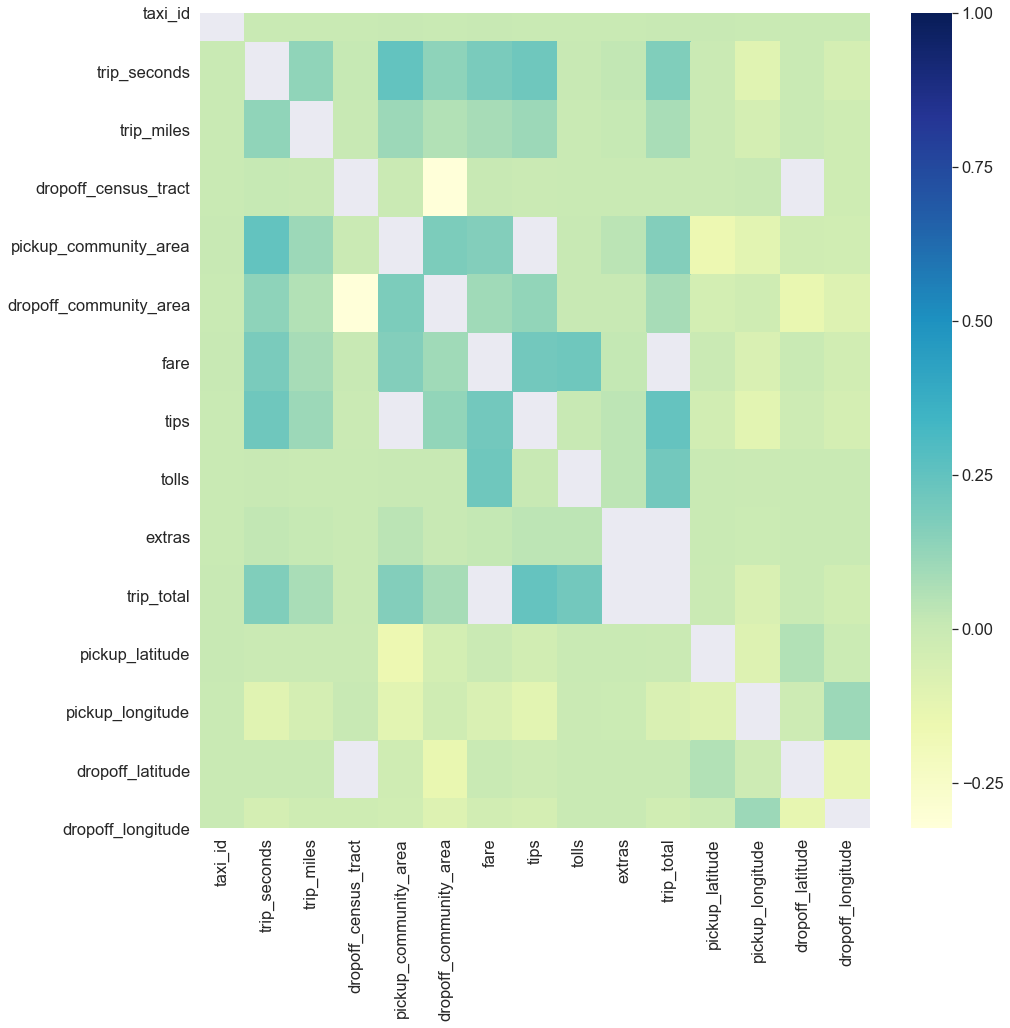

In [17]:
plt.figure(figsize=(15,15))
mask=jan.corr() > 0.3
sns.heatmap(jan.corr(),cmap='YlGnBu',mask=mask,fmt='.1g')

### 주행거리 결측인 데이터 삭제

In [183]:
jan_1.isnull().sum()

taxi_id                       23
trip_start_timestamp           0
trip_end_timestamp           125
trip_seconds                 314
trip_miles                    14
dropoff_census_tract      738308
pickup_community_area     285787
dropoff_community_area    313651
fare                           0
tips                           0
tolls                          0
extras                         0
trip_total                     0
payment_type                   0
pickup_latitude           285755
pickup_longitude          285755
dropoff_latitude          311678
dropoff_longitude         311678
dtype: int64

In [185]:
# trip_miles 주행거리가 NaN인 데이터 출력
jan_1.loc[jan_1.trip_miles.isnull()]

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
125904,4251.0,2016-1-15 11:00:00,2016-1-15 11:15:00,1260.0,NaN,NaN,16.0,16.0,3.25,0.00,0.0,0.0,3.25,Cash,527.0,24.0,527.0,24.0
523639,7158.0,2016-1-1 15:45:00,2016-1-1 15:45:00,0.0,NaN,NaN,16.0,16.0,3.25,0.00,0.0,0.0,3.25,Cash,527.0,24.0,527.0,24.0
553994,2960.0,2016-1-1 19:15:00,2016-1-1 19:30:00,60.0,NaN,NaN,16.0,16.0,3.25,0.00,0.0,0.0,3.25,Cash,527.0,24.0,527.0,24.0
701063,4194.0,2016-1-4 10:45:00,2016-1-4 10:45:00,180.0,NaN,NaN,6.0,6.0,5.00,0.00,0.0,0.0,5.00,Cash,686.0,500.0,686.0,500.0
708632,1894.0,2016-1-22 12:15:00,2016-1-22 12:15:00,0.0,NaN,NaN,1.0,1.0,3.25,0.00,0.0,1.0,4.25,Cash,37.0,370.0,37.0,370.0
790024,7888.0,2016-1-5 15:45:00,2016-1-5 15:45:00,0.0,NaN,NaN,1.0,1.0,3.25,0.00,0.0,0.0,3.25,Cash,37.0,370.0,37.0,370.0
796089,6171.0,2016-1-1 12:30:00,2016-1-1 12:30:00,540.0,NaN,16.0,24.0,32.0,10.25,0.00,0.0,0.0,10.25,Cash,427.0,286.0,18.0,610.0
826332,4362.0,2016-1-11 13:30:00,2016-1-11 14:15:00,2520.0,NaN,NaN,NaN,NaN,88.25,20.44,0.0,48.0,156.69,Credit Card,NaN,NaN,NaN,NaN
845003,7333.0,2016-1-1 15:30:00,2016-1-1 15:45:00,120.0,NaN,895.0,11.0,11.0,3.25,0.00,0.0,0.0,3.25,Cash,289.0,692.0,289.0,692.0
1002017,7333.0,2016-1-6 15:30:00,2016-1-6 15:30:00,0.0,NaN,142.0,1.0,1.0,3.25,0.00,0.0,1.0,4.25,Cash,5.0,15.0,5.0,15.0


In [186]:
# trip_total이 결측치인 데이터 인덱스 리스트 생성
idx_list = jan_1.loc[jan_1.trip_miles.isnull()].index
jan_1.drop(labels=idx_list,axis=0,inplace=True)

In [188]:
jan_1.reset_index().drop('index', axis = 1, inplace = True)

In [190]:
jan_1.isnull().sum()

taxi_id                       23
trip_start_timestamp           0
trip_end_timestamp           125
trip_seconds                 314
trip_miles                     0
dropoff_census_tract      738297
pickup_community_area     285786
dropoff_community_area    313650
fare                           0
tips                           0
tolls                          0
extras                         0
trip_total                     0
payment_type                   0
pickup_latitude           285754
pickup_longitude          285754
dropoff_latitude          311677
dropoff_longitude         311677
dtype: int64

In [162]:
# 주행거리가 결측인 데이터들의 인덱스 리스트 생성
idx_list = jan.loc[jan.trip_miles.isnull()].index; idx_list

Int64Index([ 125907,  523649,  554005,  701077,  708646,  790040,  796105,
             826348,  845019, 1002038, 1125220, 1174885, 1328963, 1349085],
           dtype='int64')

In [37]:
jan.fare.dropna(axis=0,inplace = True)

In [38]:
jan.fare.isnull().sum()

0

In [39]:
jan.isnull().sum()

taxi_id                        23
trip_start_timestamp            0
trip_end_timestamp            125
trip_seconds                  314
trip_miles                     14
pickup_census_tract       1705805
dropoff_census_tract       738326
pickup_community_area      285789
dropoff_community_area     313655
fare                           33
tips                           33
tolls                          33
extras                         33
trip_total                     33
payment_type                    0
company                    632726
pickup_latitude            285757
pickup_longitude           285757
dropoff_latitude           311682
dropoff_longitude          311682
dtype: int64

In [24]:
from datetime import datetime

In [25]:
def str_2_time(data):
    if data == 'NaN':
        timedata = data
    elif data == 'nan':
        timedata = data
    else :
        timedata = datetime.strptime(data, '%Y-%m-%d %H:%M:%S')
    return timedata

In [26]:
jan['trip_start_timestamp'] = jan['trip_start_timestamp'].map(str_2_time)

In [27]:
jan['trip_end_timestamp'] = jan['trip_end_timestamp'].astype('str')
# jan['trip_end_timestamp'].loc[jan['trip_end_timestamp'] == 'nan'] = pd.NaT

In [28]:
jan['trip_end_timestamp'] = jan['trip_end_timestamp'].map(str_2_time)

In [29]:
jan['trip_seconds'].describe()

count    1.705491e+06
mean     6.534422e+02
std      9.327260e+02
min      0.000000e+00
25%      2.400000e+02
50%      4.800000e+02
75%      8.400000e+02
max      8.634000e+04
Name: trip_seconds, dtype: float64

In [160]:
jan[(jan['trip_seconds']==0) & (jan['fare']==0)]

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
34,4545.0,2016-01-01 00:00:00,2016-01-01 00:00:00,0.0,0.0,NaN,179.0,32.0,32.0,0.0,0.0,0.0,0.0,0.0,Cash,119.0,30.0,405.0,30.0,405.0
719,251.0,2016-01-10 22:15:00,2016-01-10 22:15:00,0.0,0.0,NaN,911.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,Cash,10.0,688.0,206.0,688.0,206.0
2913,1413.0,2016-01-25 20:00:00,2016-01-25 20:00:00,0.0,0.0,NaN,970.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,Cash,82.0,210.0,470.0,210.0,470.0
3118,3475.0,2016-01-22 04:00:00,2016-01-22 04:00:00,0.0,0.0,NaN,NaN,21.0,NaN,0.0,0.0,0.0,0.0,0.0,Cash,107.0,95.0,781.0,NaN,NaN
4218,1683.0,2016-01-23 19:00:00,2016-01-23 19:00:00,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Cash,101.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684782,8361.0,2016-01-01 18:15:00,2016-01-01 18:15:00,0.0,0.0,NaN,NaN,16.0,NaN,0.0,0.0,0.0,0.0,0.0,Cash,82.0,184.0,535.0,NaN,NaN
1696413,53.0,2016-01-20 07:45:00,2016-01-20 07:45:00,0.0,0.0,NaN,NaN,21.0,21.0,0.0,0.0,0.0,0.0,0.0,Cash,8.0,95.0,781.0,95.0,781.0
1701648,5433.0,2016-01-17 10:15:00,2016-01-17 10:15:00,0.0,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,Cash,109.0,37.0,370.0,NaN,NaN
1703362,4189.0,2016-01-16 00:45:00,2016-01-16 00:45:00,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Credit Card,68.0,NaN,NaN,NaN,NaN


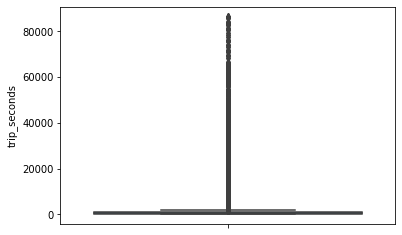

In [153]:
sns.boxplot(jan['trip_seconds'],orient = 'v')

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.704553e+06, 5.300000e+02, 1.260000e+02, 6.400000e+01,
        6.000000e+01, 5.200000e+01, 4.700000e+01, 2.800000e+01,
        1.400000e+01, 1.700000e+01]),
 array([    0.,  8634., 17268., 25902., 34536., 43170., 51804., 60438.,
        69072., 77706., 86340.]),
 <a list of 10 Patch objects>)

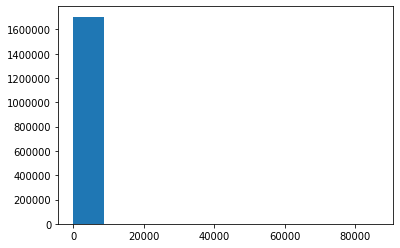

In [149]:
plt.hist(jan['trip_seconds'])

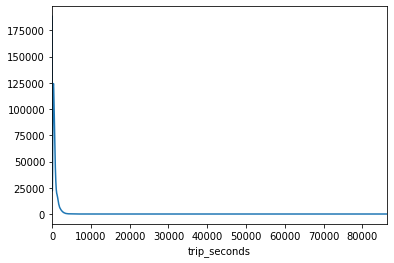

In [142]:
plt.figure()
plt.plot()
jan.groupby(['trip_seconds'])['trip_seconds'].count().plot()

# 1. EDA

## 1) 변수 탐색

In [65]:
jan = taxi1

In [66]:
jan.columns

Index(['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude'],
      dtype='object')

In [67]:
jan.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [31]:
jan[jan['trip_end_timestamp'] == 'nan']['trip_end_timestamp'] = np.NaN

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
jan.loc[jan.trip_end_timestamp == 'nan']['trip_end_timestamp']

513        nan
20251      nan
32650      nan
36889      nan
39269      nan
          ... 
1628215    nan
1630323    nan
1652674    nan
1660211    nan
1695756    nan
Name: trip_end_timestamp, Length: 125, dtype: object

In [22]:
jan['trip_end_timestamp'] = jan['trip_end_timestamp'].map(str_2_time)

SyntaxError: invalid syntax (<ipython-input-22-dbed226ec8e7>, line 1)

In [18]:
print(jan.info())
print(jan.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705805 entries, 0 to 1705804
Data columns (total 20 columns):
taxi_id                   float64
trip_start_timestamp      datetime64[ns]
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type              object
company                   float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtypes: datetime64[ns](1), float64(17), object(2)
memory usage: 260.3+ MB
None
   taxi_id trip_start_timestamp  trip_end_timestamp  trip_seconds  trip_miles  \
0     85.0  2016-01-13 06:15:00  2016-1-13

In [ ]:
jan['trip_end_timestamp'] = jan['trip_end_timestamp'].map(str_2_time)

In [80]:
jan['trip_end_timestamp'] = jan['trip_end_timestamp'].astype('str')